In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fitter import Fitter

<h1> 1. Sales Data Analysis

In [2]:
data_train = pd.read_csv('Data-train.csv',index_col=0)
data_train.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,63,24,3.0,60.0,3,6.442475,319.0,108.0,86.142857,3.500000,6,28.000000,0.400000,3.000000,0.800000,0.000000,2.200000,2.666667,2.250000,7
1,25,23,3.0,60.0,1,9.235513,343.0,79.0,48.985714,21.142857,7,32.444444,0.222222,3.333333,0.555556,0.181818,2.333333,3.000000,1.777778,14
2,84,26,3.0,60.0,2,5.714287,977.0,79.9,40.448333,36.214286,6,32.954545,0.431818,3.441860,0.727273,0.555556,2.181818,3.133333,2.000000,60
3,0,5,3.0,90.0,4,25.848665,242.0,129.0,129.000000,8.928571,6,40.000000,0.500000,3.500000,1.000000,0.500000,2.500000,3.000000,1.000000,2
4,40,14,3.0,80.0,4,16.480457,681.0,79.0,68.533333,18.214286,5,33.333333,0.083333,2.900000,0.800000,0.000000,2.500000,2.142857,2.900000,15


In [3]:
# Check of NA value
data_train.isna().any()

productID               False
brandID                 False
attribute1              False
attribute2              False
attribute3              False
attribute4              False
clickVolume             False
avgOriginalUnitPrice    False
avgFinalUnitPrice       False
ma14SalesVolume         False
weekday                 False
meanAge                 False
gender                  False
meanEducation           False
maritalStatus           False
plus                    False
meanPurchasePower       False
meanUserLevel           False
meanCityLevel           False
sales                   False
dtype: bool

In [4]:
# Check the variety of the data points
data_train.nunique()

productID                 75
brandID                   31
attribute1                 3
attribute2                 7
attribute3                31
attribute4              2211
clickVolume             1096
avgOriginalUnitPrice     346
avgFinalUnitPrice       1791
ma14SalesVolume          658
weekday                    7
meanAge                  613
gender                   298
meanEducation            341
maritalStatus            284
plus                     304
meanPurchasePower        292
meanUserLevel            564
meanCityLevel            403
sales                    126
dtype: int64

In [5]:
# Check the types (categorical or numerical) of data points
data_train.dtypes

productID                 int64
brandID                   int64
attribute1              float64
attribute2              float64
attribute3                int64
attribute4              float64
clickVolume             float64
avgOriginalUnitPrice    float64
avgFinalUnitPrice       float64
ma14SalesVolume         float64
weekday                   int64
meanAge                 float64
gender                  float64
meanEducation           float64
maritalStatus           float64
plus                    float64
meanPurchasePower       float64
meanUserLevel           float64
meanCityLevel           float64
sales                     int64
dtype: object

In [6]:
# Check the unique values in the 3 attributes
data_train['attribute1'].unique(),data_train['attribute2'].unique(),data_train['attribute3'].unique()

(array([3., 2., 4.]),
 array([ 60.,  90.,  80.,  40., 100.,  70.,  50.]),
 array([ 3,  1,  2,  4,  7,  5,  8, 18, 12, 13, 39,  6, 16,  9, 10, 14, 11,
        22, 15, 25, 21, 26, 23, 17, 29, 28, 19, 20, 30, 24, 35]))

Value at the 99.7th percentile: 201.32999999999902
Number of data points > 200: 7


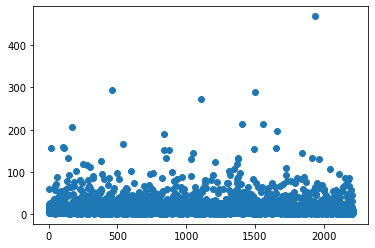

In [7]:
# Check the outliers of the sales results
data = data_train['sales']
pct_95 = np.percentile(data, 99.7)
count = len(np.where(np.array(data) > 200)[0])
print("Value at the 99.7th percentile:", pct_95)
print("Number of data points > 200:", count)

fig,ax = plt.subplots()
ax.scatter(range(len(data)), data)
plt.show()

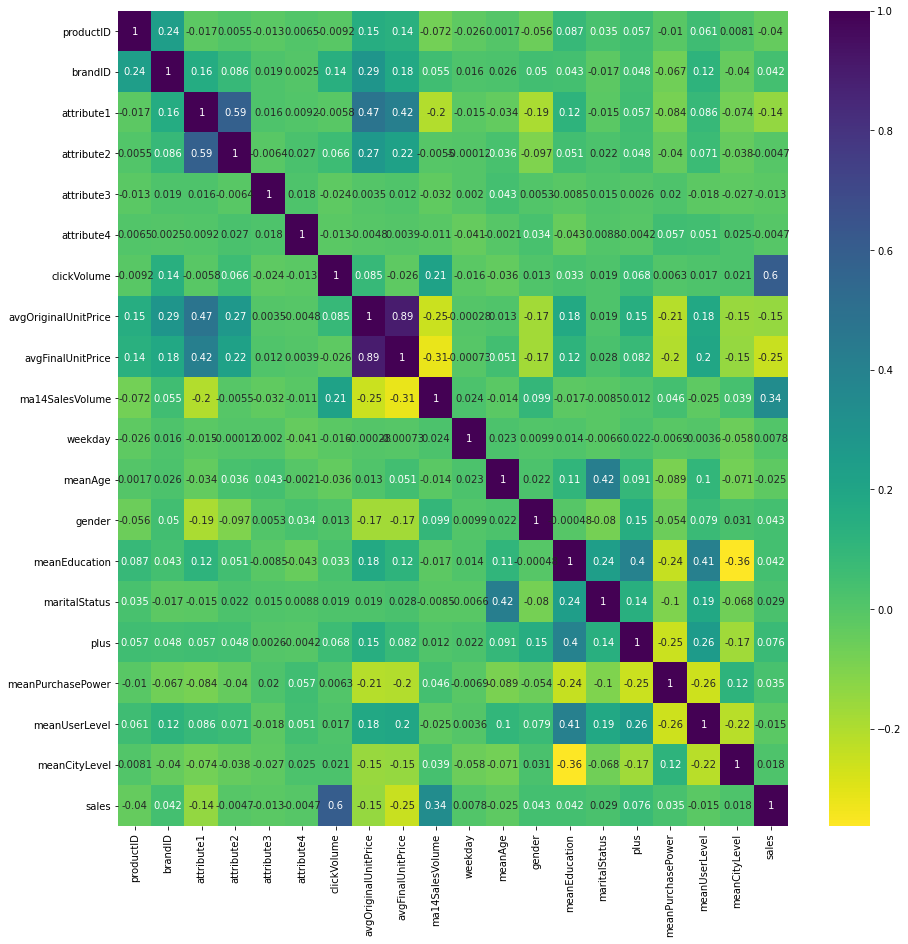

In [8]:
# Check the correlations of the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data_train.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis_r')
plt.show()

<h1> 2. Inventory Data Analysis

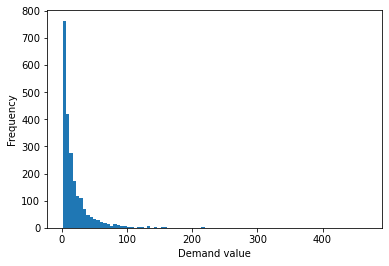

In [9]:
# sales
plt.hist(data_train["sales"],  bins=90)
plt.xlabel('Demand value')
plt.ylabel('Frequency')
plt.show()

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00, 23.89it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000051,1892.191068,-38845.195820,inf,0.046041,1.641725e-04
expon,0.000379,3167.529355,-34432.591133,inf,0.114436,1.114888e-25
norm,0.004040,9401.605962,-29197.721244,inf,0.255448,1.092385e-127


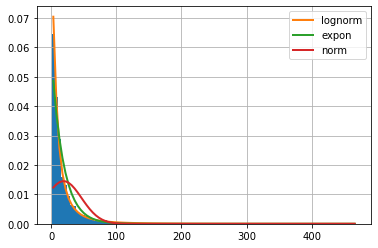

In [11]:
data_train = pd.read_csv('Data-train.csv',index_col=0)

y_predict = data_train["sales"].values
f = Fitter(y_predict, distributions=['lognorm', 'norm', 'expon'], timeout=6000)
f.fit()
f.summary()